In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
from time import sleep

warnings.filterwarnings("ignore")

In [8]:
def load_data(file_path_x, file_path_y, test_size=0.2, val_size=0.2):
    X = np.load(file_path_x)
    y = np.load(file_path_y)

    # Split: 60% train, 20% val, 20% test
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=(test_size + val_size), random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp,
        y_temp,
        test_size=test_size / (test_size + val_size),
        random_state=42,
        stratify=y_temp,
    )

    #Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [3]:
def train_model(X_train, y_train, X_val, y_val, hpp):

    model = MLPClassifier(**hpp)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    return model

In [4]:
n = 16
x_train, x_val, x_test, y_train, y_val, y_test = load_data(
    f"Datasets/kryptonite-{n}-X.npy",
    f"Datasets/kryptonite-{n}-y.npy",
    test_size=0.2,
    val_size=0.2,
)
print(
    f"Data shapes -> X_train: {x_train.shape}, y_train: {y_train.shape}, X_val: {x_val.shape}, y_val: {y_val.shape}, X_test: {x_test.shape}, y_test: {y_test.shape}"
)

Data shapes -> X_train: (19200, 16), y_train: (19200,), X_val: (6400, 16), y_val: (6400,), X_test: (6400, 16), y_test: (6400,)


In [60]:
hpp = {
    "hidden_layer_sizes": (64, 64, 32),
    "activation": "relu",
    "solver": "adam",
    "learning_rate_init": 0.001,
    "alpha": 0.1,
    "batch_size": 128,
    "max_iter": 500,
    "early_stopping": True,
    "n_iter_no_change": 50,
    "random_state": 42,
    "verbose": True,
}
model = train_model(x_train, y_train, x_val, y_val, hpp)

Iteration 1, loss = 0.74331953
Validation score: 0.491667
Iteration 2, loss = 0.73033179
Validation score: 0.498958
Iteration 3, loss = 0.72247464
Validation score: 0.500521
Iteration 4, loss = 0.71719057
Validation score: 0.507292
Iteration 5, loss = 0.71273244
Validation score: 0.502083
Iteration 6, loss = 0.70950153
Validation score: 0.500521
Iteration 7, loss = 0.70699455
Validation score: 0.503646
Iteration 8, loss = 0.70406606
Validation score: 0.518229
Iteration 9, loss = 0.70168610
Validation score: 0.515625
Iteration 10, loss = 0.69942789
Validation score: 0.523958
Iteration 11, loss = 0.69606967
Validation score: 0.546354
Iteration 12, loss = 0.69080274
Validation score: 0.550000
Iteration 13, loss = 0.68219840
Validation score: 0.577083
Iteration 14, loss = 0.66009101
Validation score: 0.642708
Iteration 15, loss = 0.59814769
Validation score: 0.735417
Iteration 16, loss = 0.52199433
Validation score: 0.768750
Iteration 17, loss = 0.46844813
Validation score: 0.798958
Iterat

In [61]:
def save_model(model, file_path):
    import joblib

    joblib.dump(model, file_path)
    print(f"Model saved to {file_path}")

In [62]:
save_model(
    model,
    f"models/features-{n}-hidden-{hpp['hidden_layer_sizes']}-alpha-{hpp['alpha']}.joblib",
)

Model saved to models/features-16-hidden-(64, 64, 32)-alpha-0.1.joblib


In [63]:
n = 18
x_train, x_val, x_test, y_train, y_val, y_test = load_data(
    f"Datasets/kryptonite-{n}-X.npy",
    f"Datasets/kryptonite-{n}-y.npy",
    test_size=0.2,
    val_size=0.2,
)
print(
    f"Data shapes -> X_train: {x_train.shape}, y_train: {y_train.shape}, X_val: {x_val.shape}, y_val: {y_val.shape}, X_test: {x_test.shape}, y_test: {y_test.shape}"
)

Data shapes -> X_train: (21600, 18), y_train: (21600,), X_val: (7200, 18), y_val: (7200,), X_test: (7200, 18), y_test: (7200,)


In [64]:
hpp = {
    "hidden_layer_sizes": (64, 64, 32),
    "activation": "relu",
    "solver": "adam",
    "learning_rate_init": 0.001,
    "alpha": 0.1,
    "batch_size": 128,
    "max_iter": 500,
    "early_stopping": True,
    "n_iter_no_change": 50,
    "random_state": 42,
    "verbose": True,
}
model = train_model(x_train, y_train, x_val, y_val, hpp)

Iteration 1, loss = 0.74132765
Validation score: 0.502315
Iteration 2, loss = 0.72691002
Validation score: 0.492593
Iteration 3, loss = 0.71881616
Validation score: 0.512500
Iteration 4, loss = 0.71352012
Validation score: 0.497685
Iteration 5, loss = 0.70957877
Validation score: 0.495833
Iteration 6, loss = 0.70633034
Validation score: 0.487037
Iteration 7, loss = 0.70415150
Validation score: 0.486111
Iteration 8, loss = 0.70207970
Validation score: 0.491667
Iteration 9, loss = 0.70070132
Validation score: 0.491667
Iteration 10, loss = 0.69944464
Validation score: 0.487500
Iteration 11, loss = 0.69868672
Validation score: 0.494907
Iteration 12, loss = 0.69760623
Validation score: 0.498611
Iteration 13, loss = 0.69677837
Validation score: 0.497222
Iteration 14, loss = 0.69588134
Validation score: 0.502778
Iteration 15, loss = 0.69487046
Validation score: 0.499537
Iteration 16, loss = 0.69490623
Validation score: 0.497685
Iteration 17, loss = 0.69371298
Validation score: 0.505093
Iterat

In [65]:
save_model(
    model,
    f"models/features-{n}-hidden-{hpp['hidden_layer_sizes']}-alpha-{hpp['alpha']}.joblib",
)

Model saved to models/features-18-hidden-(64, 64, 32)-alpha-0.1.joblib


In [66]:
n = 20
x_train, x_val, x_test, y_train, y_val, y_test = load_data(
    f"Datasets/kryptonite-{n}-X.npy",
    f"Datasets/kryptonite-{n}-y.npy",
    test_size=0.2,
    val_size=0.2,
)
print(
    f"Data shapes -> X_train: {x_train.shape}, y_train: {y_train.shape}, X_val: {x_val.shape}, y_val: {y_val.shape}, X_test: {x_test.shape}, y_test: {y_test.shape}"
)

Data shapes -> X_train: (24000, 20), y_train: (24000,), X_val: (8000, 20), y_val: (8000,), X_test: (8000, 20), y_test: (8000,)


In [67]:
hpp = {
    "hidden_layer_sizes": (64, 64, 32),
    "activation": "relu",
    "solver": "adam",
    "learning_rate_init": 0.001,
    "alpha": 0.1,
    "batch_size": 128,
    "max_iter": 500,
    "early_stopping": True,
    "n_iter_no_change": 50,
    "random_state": 42,
    "verbose": True,
}
model = train_model(x_train, y_train, x_val, y_val, hpp)

Iteration 1, loss = 0.74472052
Validation score: 0.502917
Iteration 2, loss = 0.73050302
Validation score: 0.499583
Iteration 3, loss = 0.72200193
Validation score: 0.507500
Iteration 4, loss = 0.71617459
Validation score: 0.509583
Iteration 5, loss = 0.71176235
Validation score: 0.511250
Iteration 6, loss = 0.70853112
Validation score: 0.501250
Iteration 7, loss = 0.70567890
Validation score: 0.502917
Iteration 8, loss = 0.70351846
Validation score: 0.505417
Iteration 9, loss = 0.70148324
Validation score: 0.506667
Iteration 10, loss = 0.69950978
Validation score: 0.514583
Iteration 11, loss = 0.69811367
Validation score: 0.518750
Iteration 12, loss = 0.69557820
Validation score: 0.500000
Iteration 13, loss = 0.69442794
Validation score: 0.522083
Iteration 14, loss = 0.69102585
Validation score: 0.524583
Iteration 15, loss = 0.68695671
Validation score: 0.543333
Iteration 16, loss = 0.67274404
Validation score: 0.585417
Iteration 17, loss = 0.63068125
Validation score: 0.677500
Iterat

In [68]:
save_model(
    model,
    f"models/features-{n}-hidden-{hpp['hidden_layer_sizes']}-alpha-{hpp['alpha']}.joblib",
)

Model saved to models/features-20-hidden-(64, 64, 32)-alpha-0.1.joblib


In [69]:
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8502


In [8]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

# =====================================================
#   POLYNOMIAL FEATURES + FEATURE SELECTION + LOGREG
# =====================================================

def evaluate_poly_logreg(X, y, n, degree=9, k_best=30, C=1.0, score_func='f_classif', penalty='l2', solver='lbfgs'):
    """
    Polynomial feature expansion + feature selection + scaling + logistic regression.
    Returns train, validation, and test accuracies.
    """

    # --- Split 60/20/20
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # --- Choose selection method
    if score_func == 'mutual_info':
        selector = SelectKBest(mutual_info_classif, k=k_best)
    else:
        selector = SelectKBest(f_classif, k=k_best)

    # --- Pipeline
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False, interaction_only=False)),  # nonlinear but compact
        ("select", selector),
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            max_iter=1000,
            C=C,
            penalty=penalty,
            solver=solver,
            random_state=42
        ))
    ])

    # --- Fit + Evaluate
    pipeline.fit(X_train, y_train)
    acc_train = pipeline.score(X_train, y_train)
    acc_val = pipeline.score(X_val, y_val)
    acc_test = pipeline.score(X_test, y_test)

    print(f"Train={acc_train:.4f}, Val={acc_val:.4f}, Test={acc_test:.4f}")
    return acc_train, acc_val, acc_test


# =====================================================
#                  MAIN LOOP
# =====================================================
summary = []

for n in range(10, 22, 2):
    print(f"\n===== Polynomial + Feature Selection + Logistic Regression on kryptonite-{n} =====")
    X = np.load(f"Datasets/kryptonite-{n}-X.npy")
    y = np.load(f"Datasets/kryptonite-{n}-y.npy")

    acc_train, acc_val, acc_test = evaluate_poly_logreg(
        X, y, n=n,
        degree=9,
        k_best=15,
        C=1.0,
        score_func='f_classif',
        penalty='l2',
        solver='saga'  # or 'saga' if data is large/sparse
    )

    summary.append({
        "n": n,
        "train_acc": acc_train,
        "val_acc": acc_val,
        "test_acc": acc_test
    })

# =====================================================
#               SUMMARY TABLE
# =====================================================
print("\n===== Summary: Polynomial + Selection + Logistic Regression =====")
print(f"{'Dataset':>10} | {'Train Acc':>10} | {'Val Acc':>9} | {'Test Acc':>9}")
print("-" * 45)
for r in summary:
    print(f"{r['n']:>10} | {r['train_acc']*100:9.2f}% | {r['val_acc']*100:8.2f}% | {r['test_acc']*100:8.2f}%")

print("\n✅ Done. This pipeline uses polynomial degree=2 (interaction_only), top-30 features, and L2-regularized logistic regression.")



===== Polynomial + Feature Selection + Logistic Regression on kryptonite-10 =====


KeyboardInterrupt: 

In [73]:
def train_model(X_train, y_train, X_val, y_val, hpp):

    model = MLPClassifier(**hpp)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    return model

# hpp = {
#     "hidden_layer_sizes": (64, 64, 32),
#     "activation": "relu",
#     "solver": "adam",
#     "learning_rate_init": 0.001,
#     "alpha": 0.1,
#     "batch_size": 128,
#     "max_iter": 500,
#     "early_stopping": True,
#     "n_iter_no_change": 50,
#     "random_state": 42,
#     "verbose": False,
# }

hpp = {
    "hidden_layer_sizes": (64, 32), # 128,128,64 works for 20dim
    "activation": "relu",
    "solver": "adam",
    "learning_rate_init": 0.002,
    "alpha": 0.1,
    "batch_size": 128,
    "max_iter": 500,
    "early_stopping": True,
    "n_iter_no_change": 50,
    "random_state": 42,
    "verbose": False,
}

for n in range(10, 12, 2):
    print(f"\nLoading data for n={n}")
    x_train, x_val, x_test, y_train, y_val, y_test = load_data(
        f"Datasets/kryptonite-{n}-X.npy",
        f"Datasets/kryptonite-{n}-y.npy",
        test_size=0.2,
        val_size=0.2,
    )
    print(
        f"Data shapes -> X_train: {x_train.shape}, y_train: {y_train.shape}, X_val: {x_val.shape}, y_val: {y_val.shape}, X_test: {x_test.shape}, y_test: {y_test.shape}"
    )
    model = train_model(x_train, y_train, x_val, y_val, hpp)

    test_predictions = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Test Accuracy for n={n}: {test_accuracy:.4f}")

    # save_model(
    #     model,
    #     f"models/features-{n}-hidden-{hpp['hidden_layer_sizes']}-alpha-{hpp['alpha']}.joblib",
    # )


Loading data for n=10
Data shapes -> X_train: (12000, 10), y_train: (12000,), X_val: (4000, 10), y_val: (4000,), X_test: (4000, 10), y_test: (4000,)
Training Accuracy: 0.9592
Validation Accuracy: 0.9573
Test Accuracy for n=10: 0.9597


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def load_data(file_path_x, file_path_y, test_size=0.2, val_size=0.2):
    X = np.load(file_path_x)
    y = np.load(file_path_y)

    # 60 / 20 / 20 split
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=(test_size + val_size), random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=test_size / (test_size + val_size),
        random_state=42,
        stratify=y_temp,
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    return X_train, X_val, X_test, y_train, y_val, y_test


# --- Your base hyperparameters ---
hpp = {
    "hidden_layer_sizes": (64, 64, 32), # 128,128,64 works for 20dim
    "activation": "relu",
    "solver": "adam",
    "learning_rate_init": 0.002,
    "alpha": 0.1,
    "batch_size": 128,
    "max_iter": 500,
    "early_stopping": True,
    "n_iter_no_change": 50,
    "random_state": 42,
    "verbose": False,
}


# --- Main loop ---
for n in range(10, 22, 2):
    print(f"\n===== Cross-validating on kryptonite-{n} =====")
    X_train, X_val, X_test, y_train, y_val, y_test = load_data(
        f"Datasets/kryptonite-{n}-X.npy",
        f"Datasets/kryptonite-{n}-y.npy",
        test_size=0.2,
        val_size=0.2,
    )

    # Combine train + val for cross-validation
    X_cv = np.vstack((X_train, X_val))
    y_cv = np.concatenate((y_train, y_val))

    model = MLPClassifier(**hpp)

    # 5-fold cross-validation on the combined set
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_cv, y_cv, cv=kfold, scoring="accuracy", n_jobs=-1)

    print(f"Cross-validation accuracies: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # retrain final model on full training+validation set
    model.fit(X_cv, y_cv)
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"✅ Test Accuracy (held-out): {test_acc:.4f}")



===== Cross-validating on kryptonite-10 =====
Cross-validation accuracies: [0.95625   0.9609375 0.9559375 0.9590625 0.9578125]
Mean CV accuracy: 0.9580 ± 0.0018
✅ Test Accuracy (held-out): 0.9600


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from tqdm import tqdm

# --- Load data ---
def load_data(file_path_x, file_path_y, test_size=0.2, val_size=0.2):
    X = np.load(file_path_x)
    y = np.load(file_path_y)

    # 60 / 20 / 20 split
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=(test_size + val_size), random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=test_size / (test_size + val_size),
        random_state=42,
        stratify=y_temp,
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test


# --- Train model ---
def train_model(X_train, y_train, X_val, y_val, hpp):
    model = MLPClassifier(**hpp)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)

    train_acc = accuracy_score(y_train, train_predictions)
    val_acc = accuracy_score(y_val, val_predictions)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")

    return model, train_acc, val_acc


# --- Parameter grid ---
param_grid = {
    "hidden_layer_sizes": [
        (32, 32)
        (64, 64),
        (128, 128),
        (64, 64, 64),
        (128, 128, 128),
        (128, 64, 32),
        (256, 128, 64),
    ],
    "alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3],
    "learning_rate_init": [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.1],
    "activation": ["relu", "tanh"],   
}

param_combinations = list(product(*param_grid.values()))
param_names = list(param_grid.keys())

print(f"\nTotal combinations to test: {len(param_combinations)}")

# --- Load dataset n=16 ---
print("\n🚀 Running Grid Search on kryptonite-16")
X_train, X_val, X_test, y_train, y_val, y_test = load_data(
    "Datasets/kryptonite-16-X.npy",
    "Datasets/kryptonite-16-y.npy",
    test_size=0.2,
    val_size=0.2,
)

results = []

# --- Run search ---
for combo in tqdm(param_combinations, desc="Grid Search Progress"):
    hpp = dict(zip(param_names, combo))
    hpp.update({
        "solver": "adam",
        "batch_size": 128,
        "max_iter": 500,
        "early_stopping": True,
        "n_iter_no_change": 50,
        "random_state": 42,
        "verbose": False,
    })

    print("\n------------------------------------------")
    print(f"🔧 Testing config: {hpp}")
    model, train_acc, val_acc = train_model(X_train, y_train, X_val, y_val, hpp)

    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"✅ Test Accuracy: {test_acc:.4f}")

    results.append({
        **hpp,
        "train_acc": train_acc,
        "val_acc": val_acc,
        "test_acc": test_acc,
    })


# --- Find best configuration ---
best_model = max(results, key=lambda x: x["val_acc"])

print("\n================= BEST MODEL =================")
print(f"Hidden layers: {best_model['hidden_layer_sizes']}")
print(f"Activation: {best_model['activation']}")
print(f"Alpha: {best_model['alpha']}")
print(f"Learning rate: {best_model['learning_rate_init']}")
print(f"Train acc: {best_model['train_acc']:.4f}")
print(f"Val acc:   {best_model['val_acc']:.4f}")
print(f"Test acc:  {best_model['test_acc']:.4f}")
print("=============================================")



🚀 Running MLP on kryptonite-10
Training Accuracy: 0.9604
Validation Accuracy: 0.9603
✅ n=10 | Train=0.960 | Val=0.960 | Test=0.958 | AUC=0.962 | F1=0.958


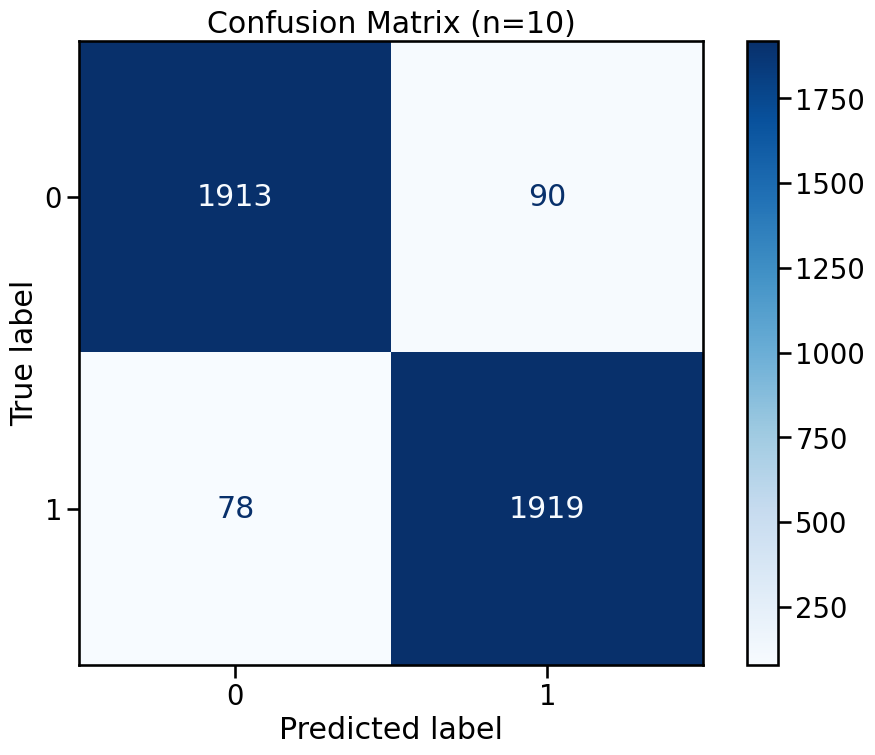

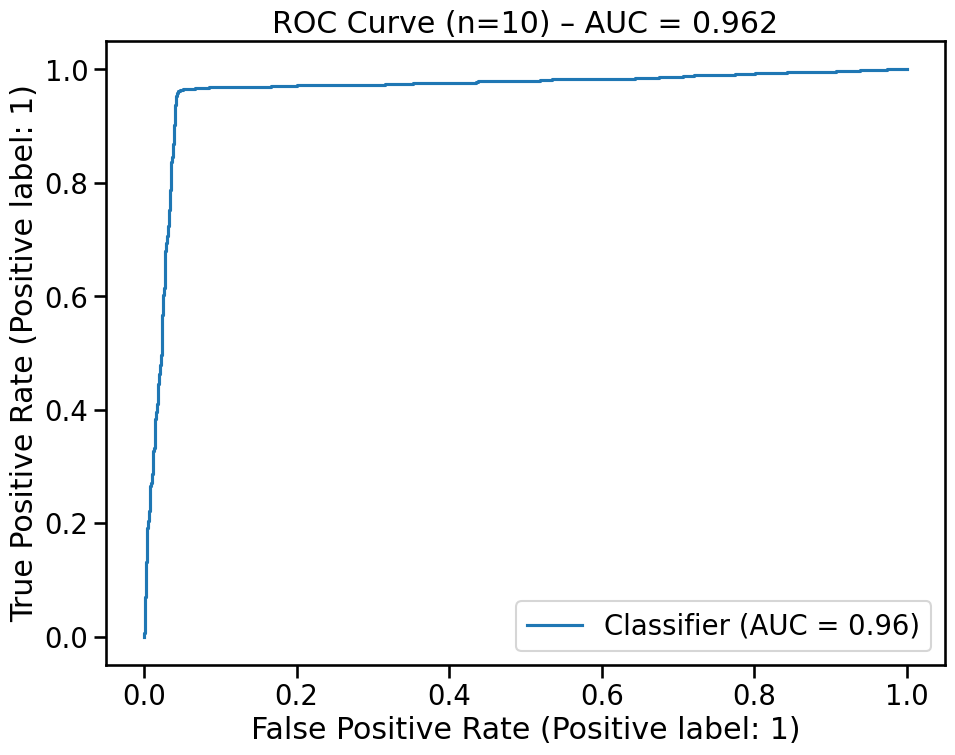

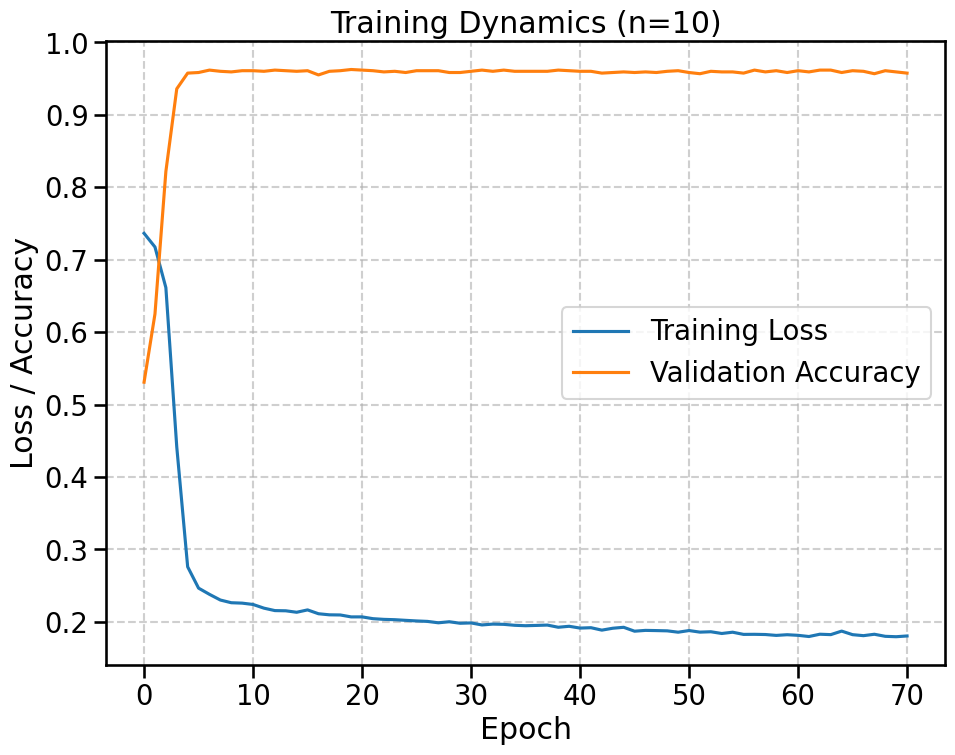


🚀 Running MLP on kryptonite-12
Training Accuracy: 0.9619
Validation Accuracy: 0.9517
✅ n=12 | Train=0.962 | Val=0.952 | Test=0.950 | AUC=0.959 | F1=0.950


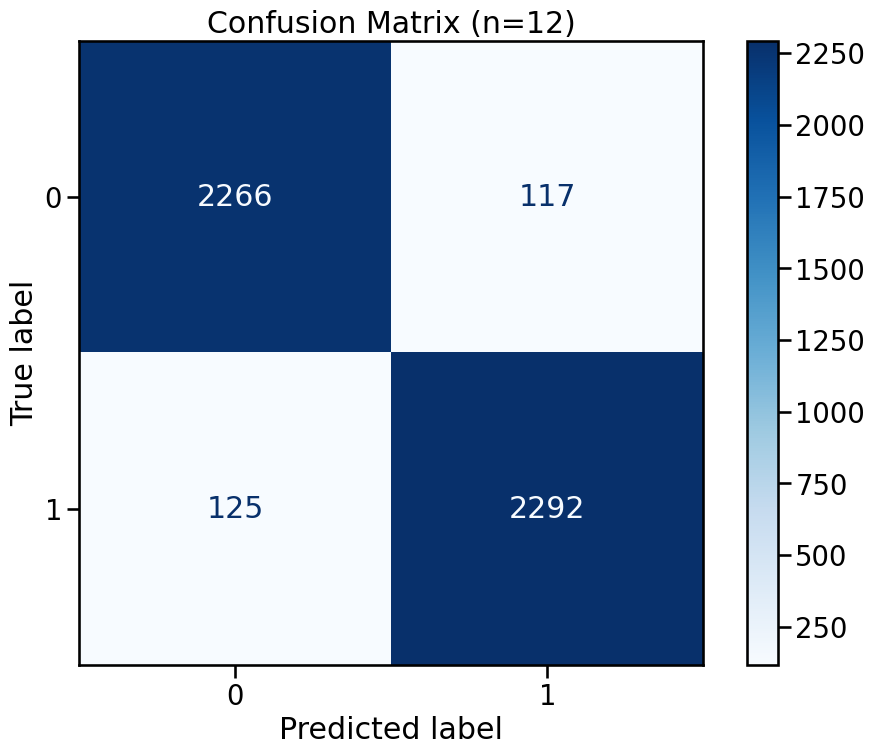

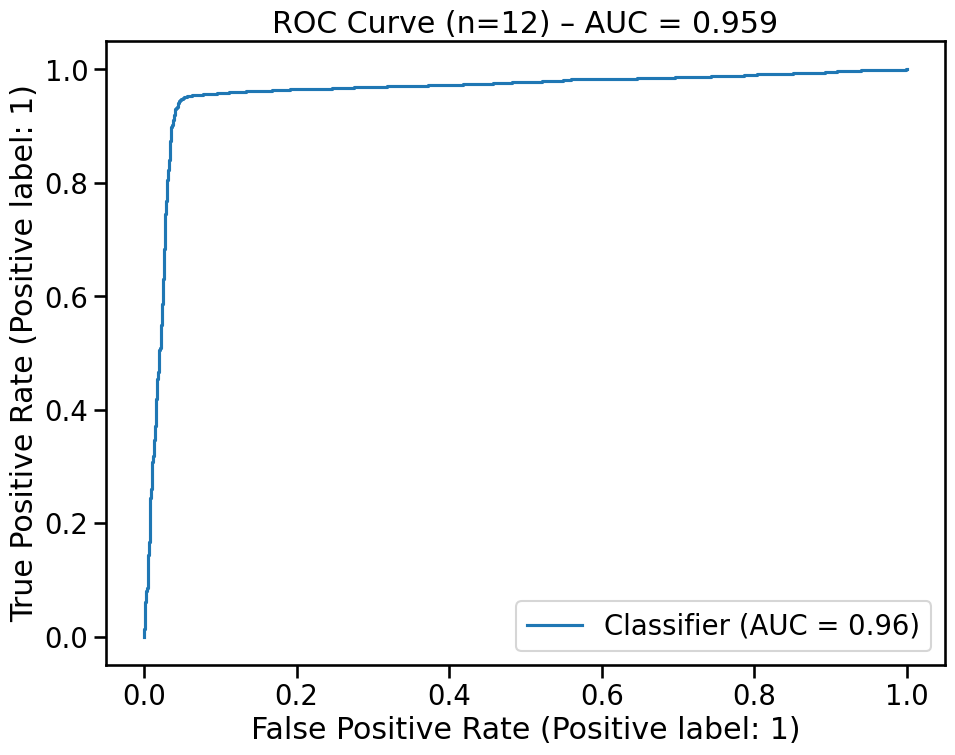

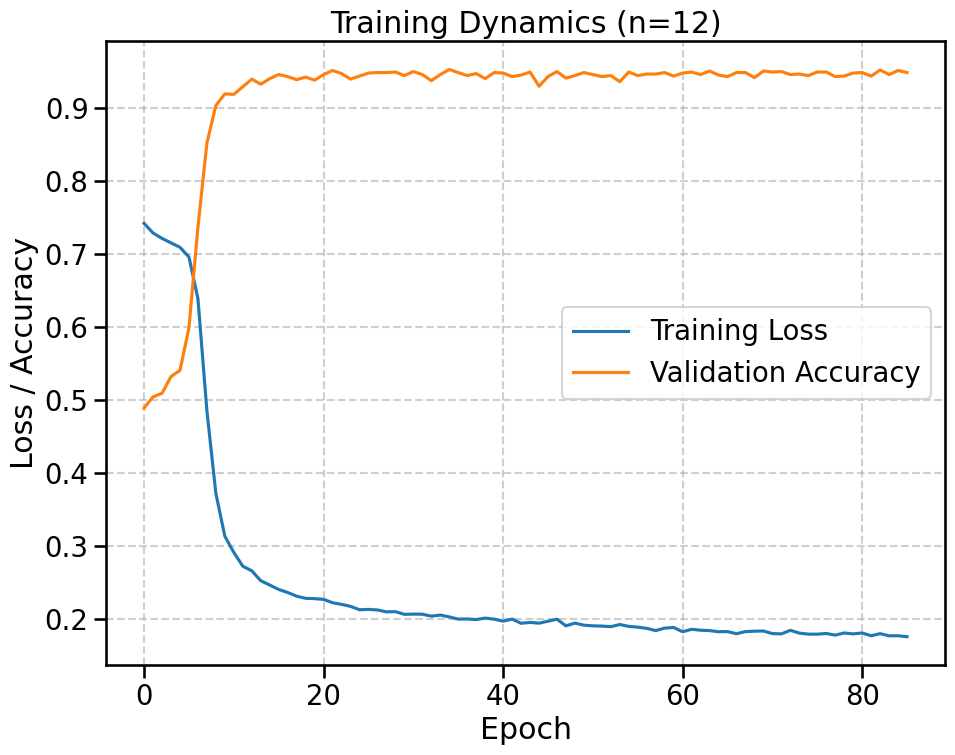


🚀 Running MLP on kryptonite-14
Training Accuracy: 0.9645
Validation Accuracy: 0.9498
✅ n=14 | Train=0.964 | Val=0.950 | Test=0.948 | AUC=0.967 | F1=0.947


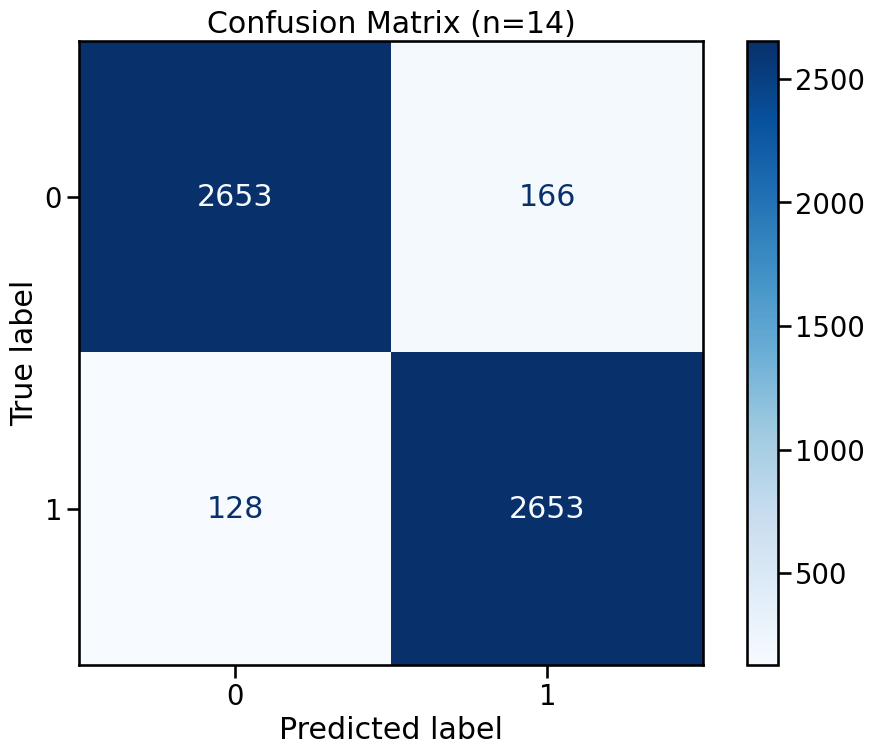

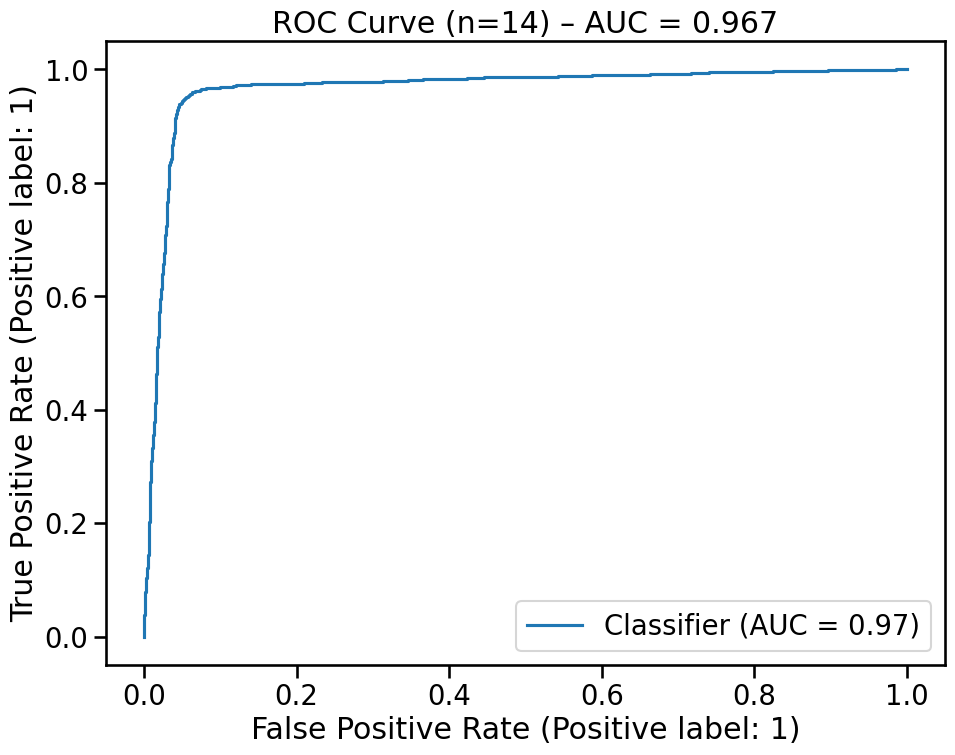

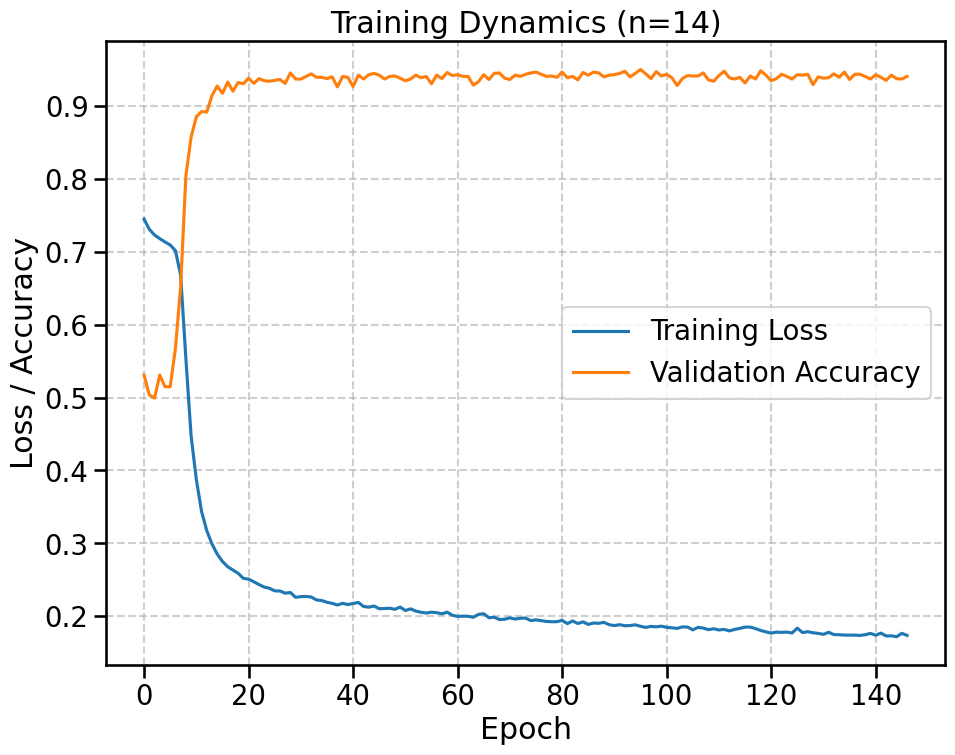


🚀 Running MLP on kryptonite-16
Training Accuracy: 0.9403
Validation Accuracy: 0.9172
✅ n=16 | Train=0.940 | Val=0.917 | Test=0.908 | AUC=0.951 | F1=0.910


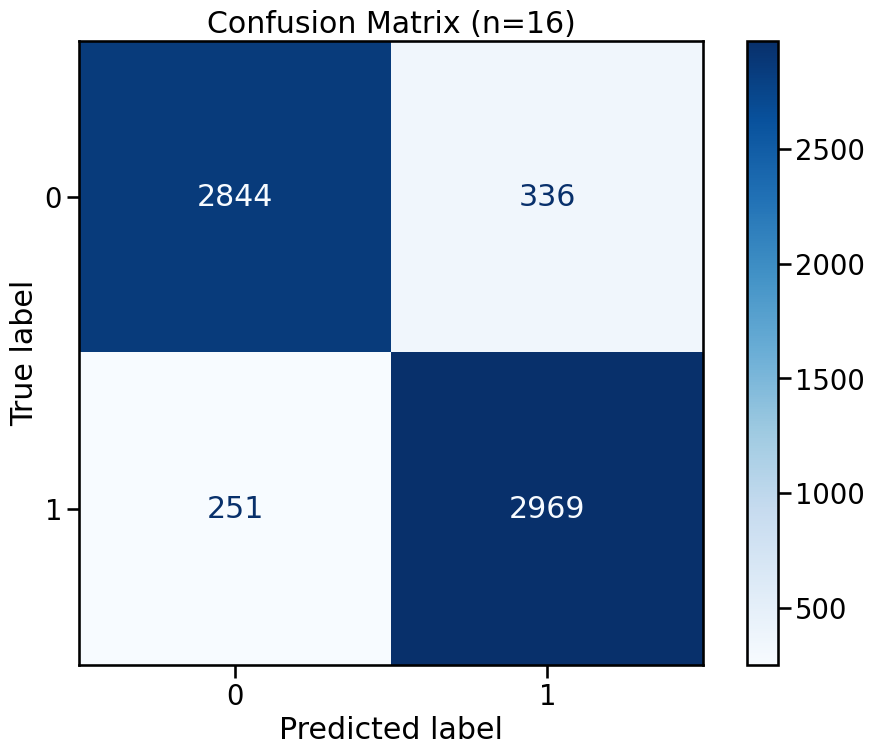

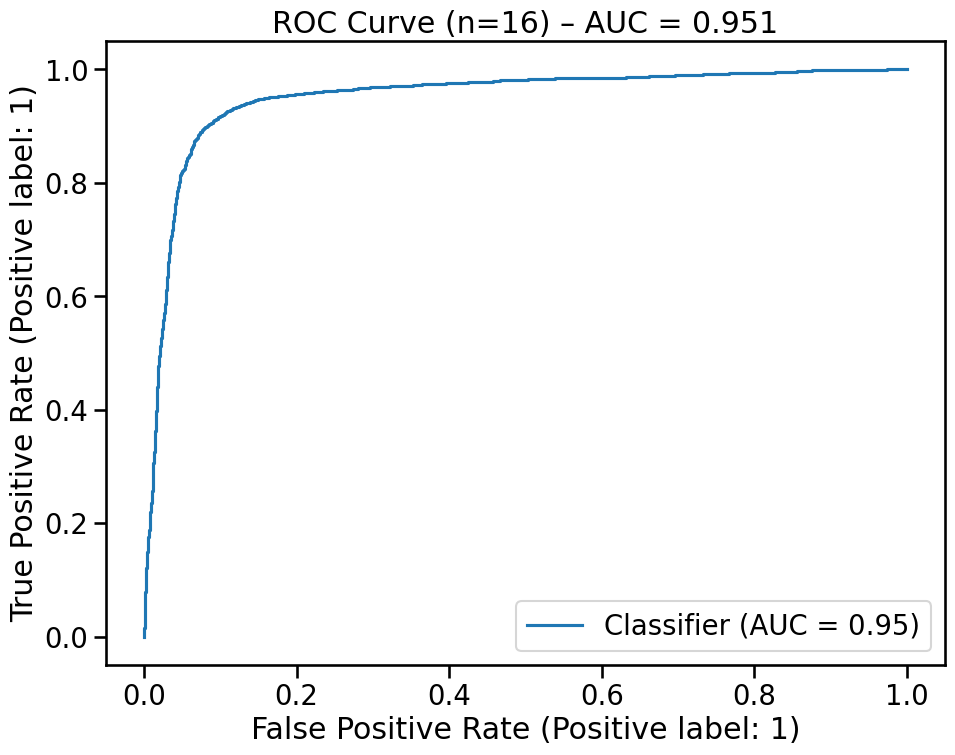

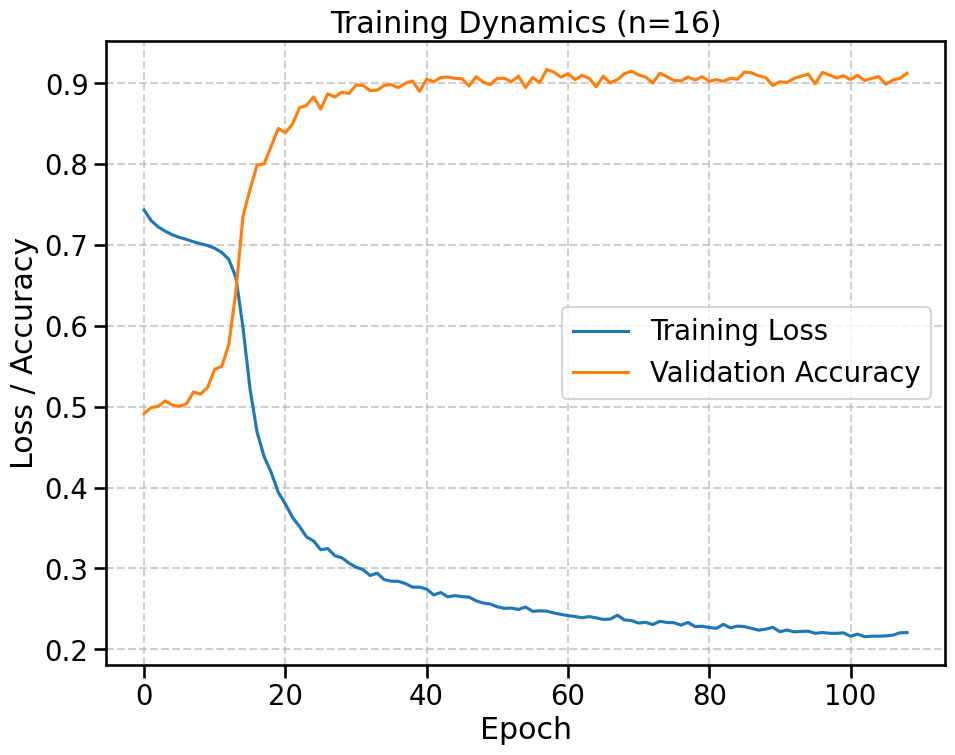


🚀 Running MLP on kryptonite-18
Training Accuracy: 0.8947
Validation Accuracy: 0.8478
✅ n=18 | Train=0.895 | Val=0.848 | Test=0.841 | AUC=0.908 | F1=0.840


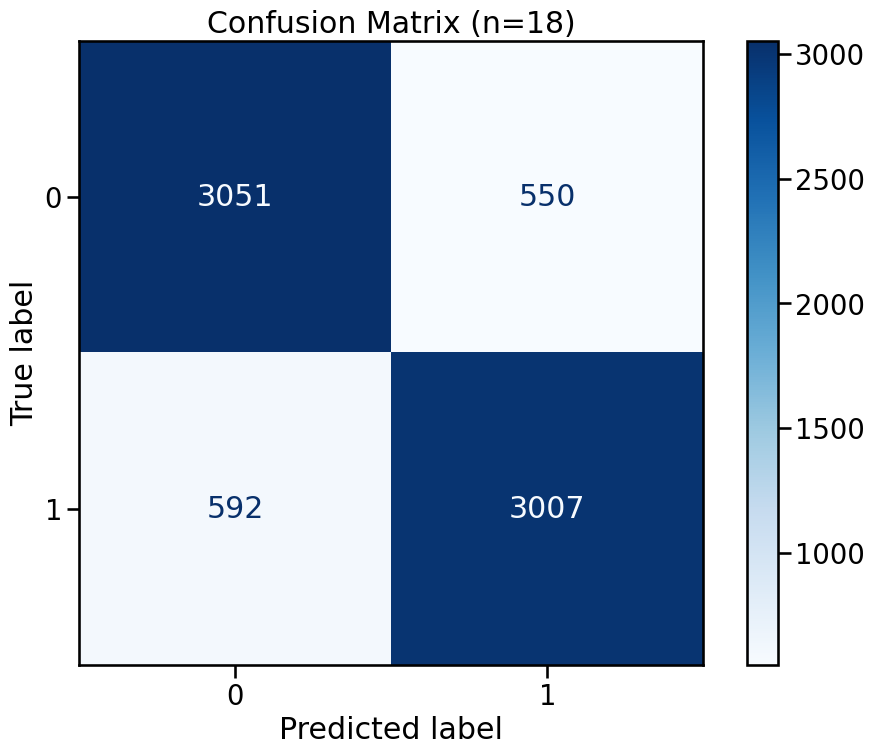

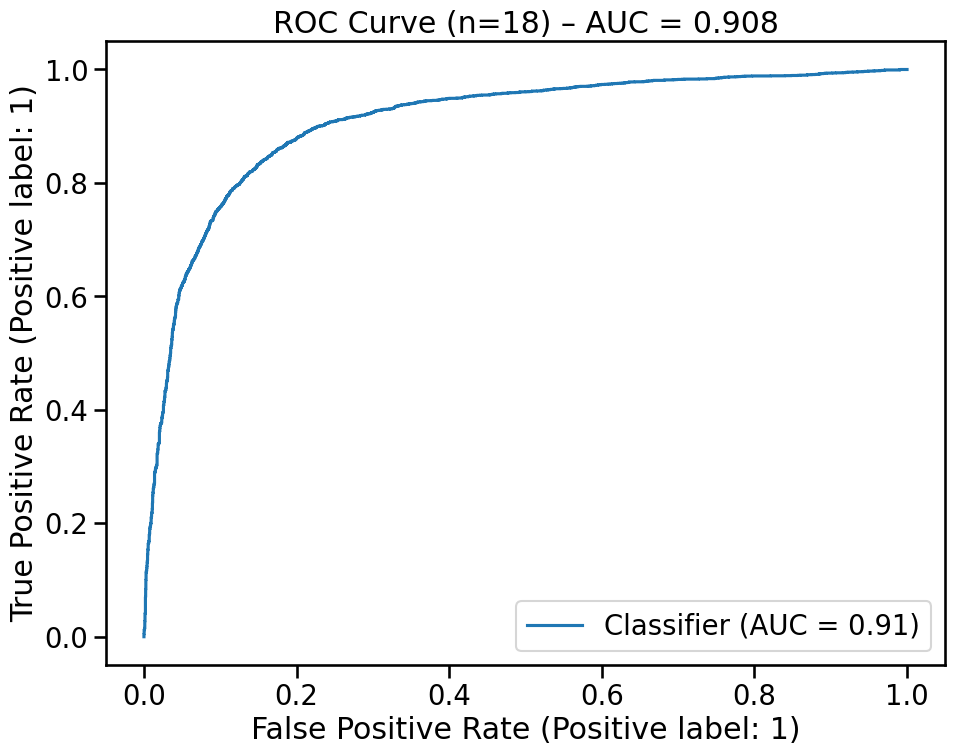

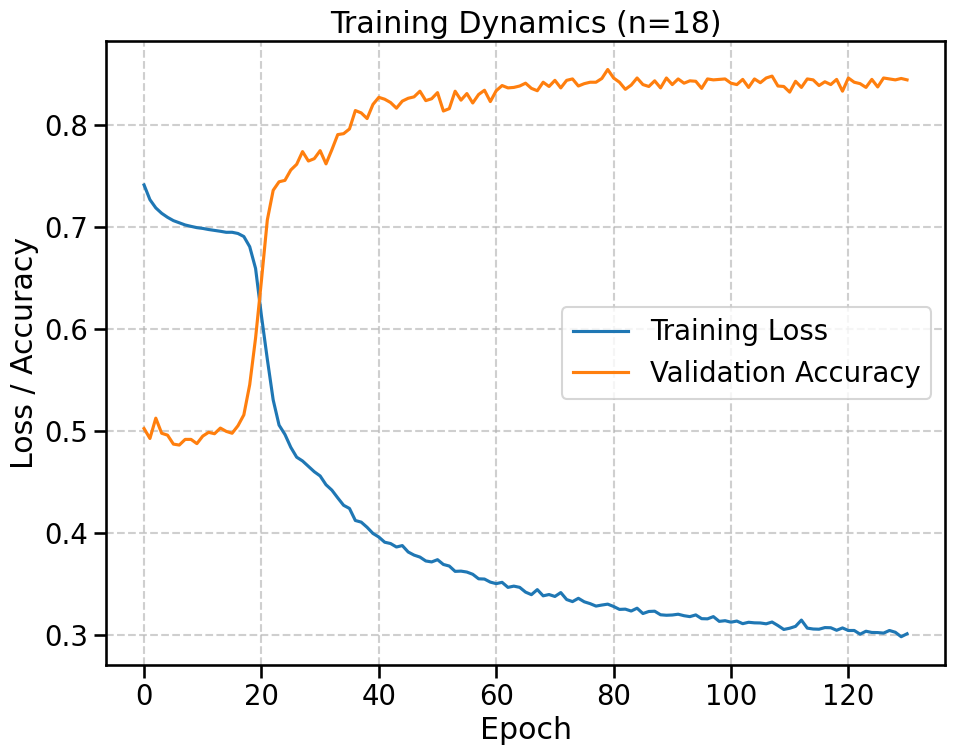


🚀 Running MLP on kryptonite-20
Training Accuracy: 0.9047
Validation Accuracy: 0.8470
✅ n=20 | Train=0.905 | Val=0.847 | Test=0.850 | AUC=0.909 | F1=0.846


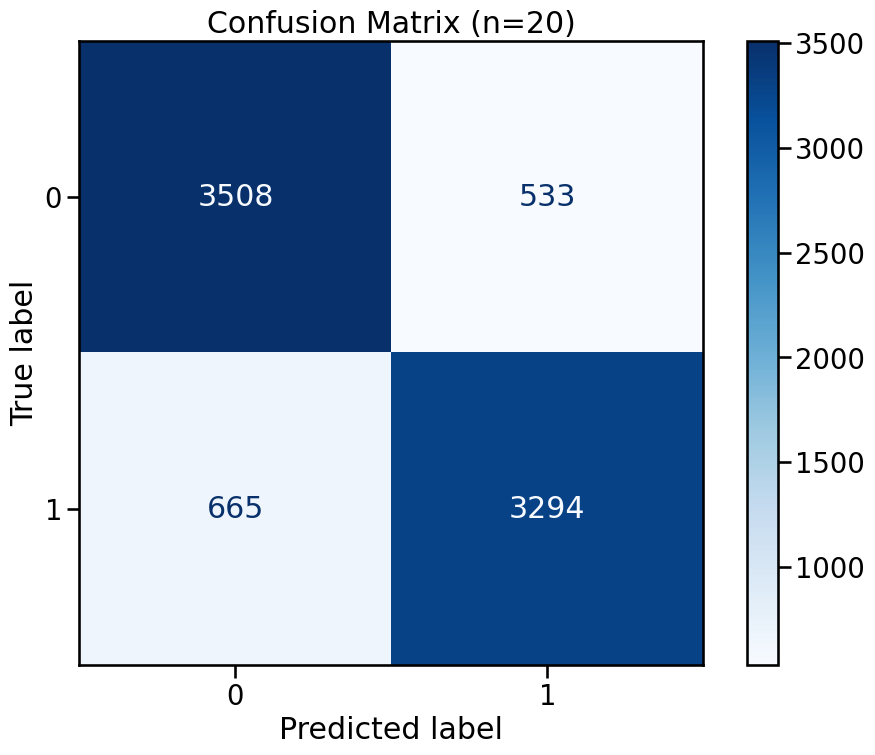

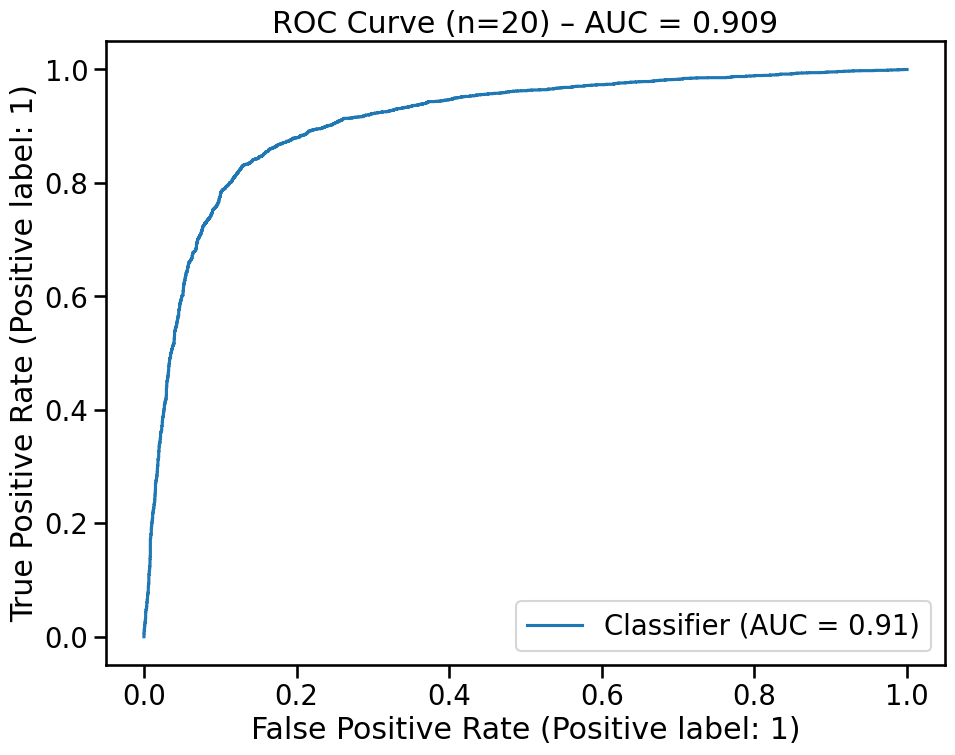

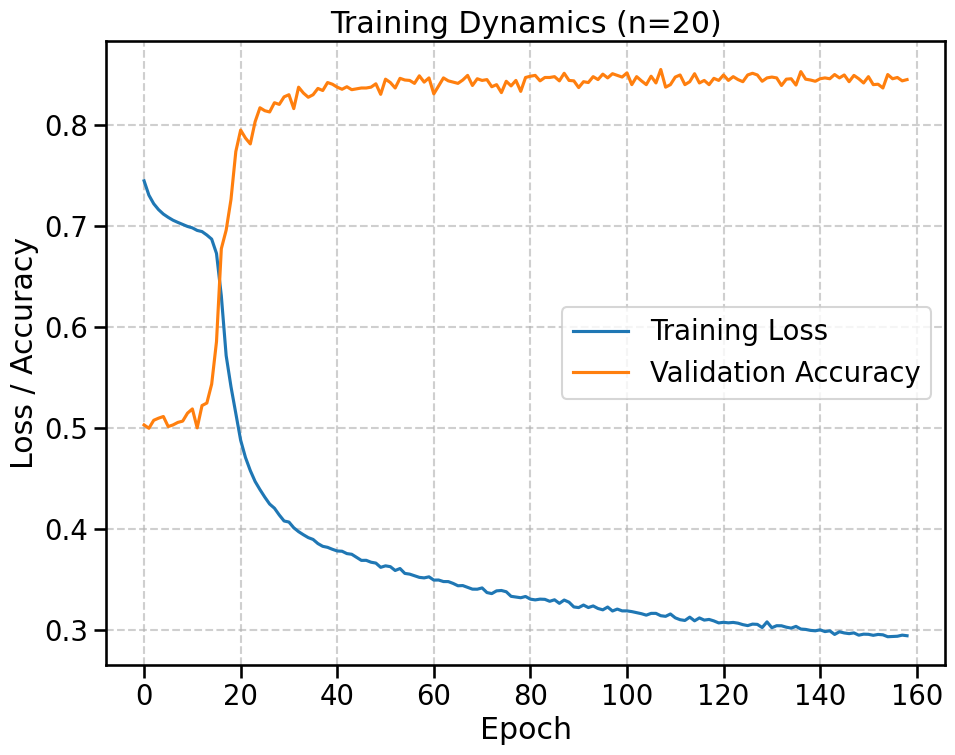

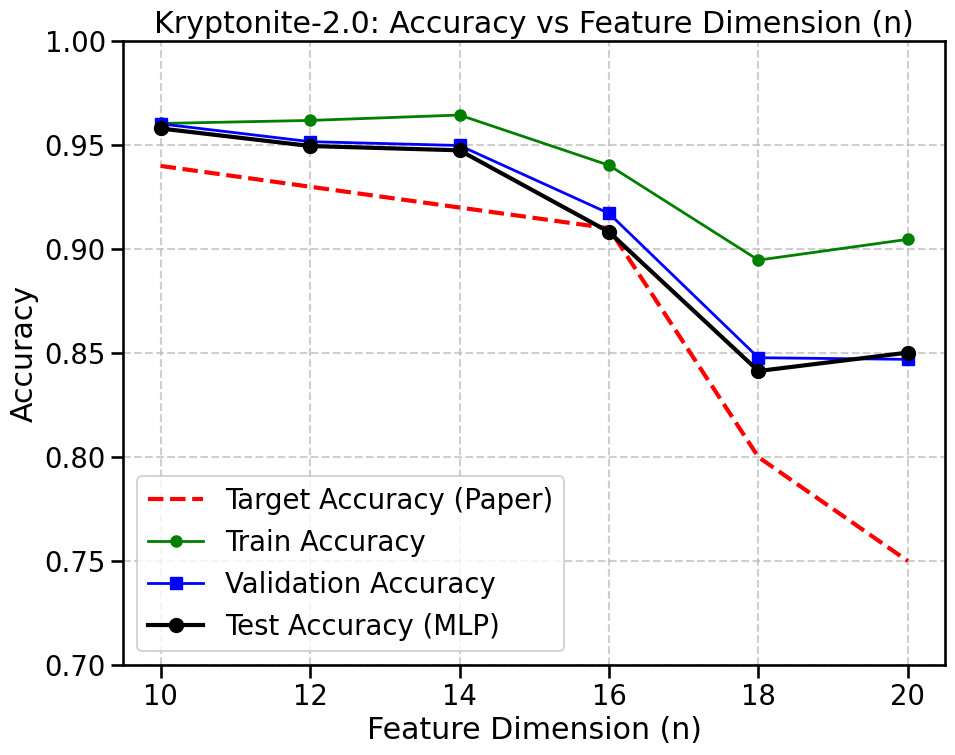

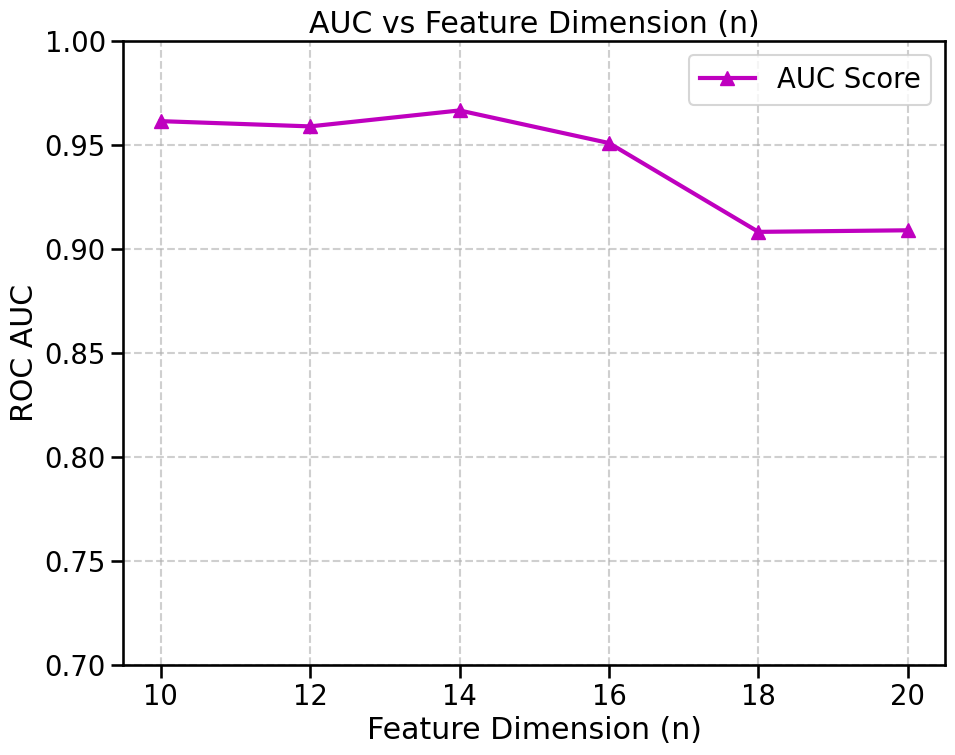

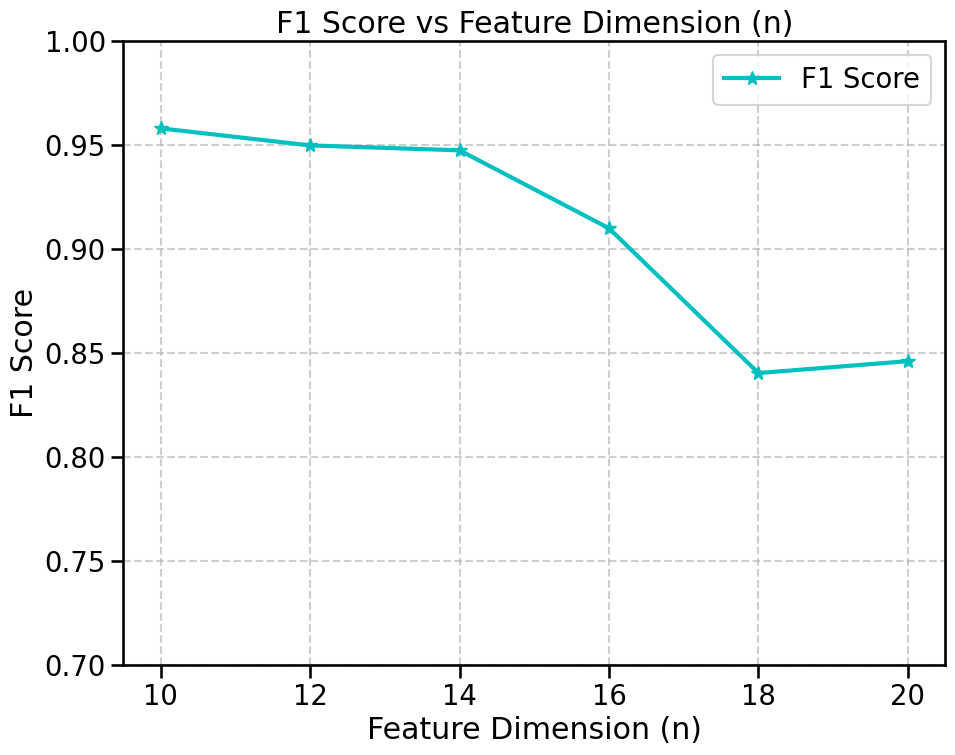

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    accuracy_score,
    f1_score,
)
import numpy as np

sns.set_context("talk", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 8)

results = []

# Target accuracies from the Kryptonite paper (same order of n)
target_acc = [0.94, 0.93, 0.92, 0.91, 0.80, 0.75]

for n in range(10, 22, 2):
    print(f"\n🚀 Running MLP on kryptonite-{n}")
    x_train, x_val, x_test, y_train, y_val, y_test = load_data(
        f"Datasets/kryptonite-{n}-X.npy",
        f"Datasets/kryptonite-{n}-y.npy",
        test_size=0.2,
        val_size=0.2,
    )

    model = train_model(x_train, y_train, x_val, y_val, hpp)

    # Predict
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)
    y_test_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_test_pred)

    results.append(
        {
            "n": n,
            "train_acc": train_acc,
            "val_acc": val_acc,
            "test_acc": test_acc,
            "auc": auc,
            "f1": f1,
        }
    )

    print(
        f"✅ n={n} | Train={train_acc:.3f} | Val={val_acc:.3f} | Test={test_acc:.3f} | AUC={auc:.3f} | F1={f1:.3f}"
    )

    # ---- Plot confusion matrix ----
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap="Blues")
    plt.title(f"Confusion Matrix (n={n})")
    plt.tight_layout()
    plt.show()

    # ---- Plot ROC curve ----
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC Curve (n={n}) – AUC = {auc:.3f}")
    plt.tight_layout()
    plt.show()

    # ---- Plot loss curve if available ----
    if hasattr(model, "loss_curve_"):
        plt.figure()
        plt.plot(model.loss_curve_, label="Training Loss")
        if hasattr(model, "validation_scores_"):
            plt.plot(model.validation_scores_, label="Validation Accuracy")
        plt.title(f"Training Dynamics (n={n})")
        plt.xlabel("Epoch")
        plt.ylabel("Loss / Accuracy")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.tight_layout()
        plt.show()


# === Summary plots ===
n_values = [r["n"] for r in results]
train_accs = [r["train_acc"] for r in results]
val_accs = [r["val_acc"] for r in results]
test_accs = [r["test_acc"] for r in results]
auc_scores = [r["auc"] for r in results]

# ---- Accuracy vs n (including target) ----
plt.figure()
plt.plot(n_values, target_acc, "r--", linewidth=3, label="Target Accuracy (Paper)")
plt.plot(n_values, train_accs, "go-", linewidth=2, markersize=8, label="Train Accuracy")
plt.plot(n_values, val_accs, "bs-", linewidth=2, markersize=8, label="Validation Accuracy")
plt.plot(n_values, test_accs, "ko-", linewidth=3, markersize=10, label="Test Accuracy (MLP)")
plt.title("Kryptonite-2.0: Accuracy vs Feature Dimension (n)")
plt.xlabel("Feature Dimension (n)")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---- AUC vs n ----
plt.figure()
plt.plot(n_values, auc_scores, "m^-", linewidth=3, markersize=10, label="AUC Score")
plt.title("AUC vs Feature Dimension (n)")
plt.xlabel("Feature Dimension (n)")
plt.ylabel("ROC AUC")
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---- F1 vs n ----
plt.figure()
plt.plot(n_values, [r["f1"] for r in results], "c*-", linewidth=3, markersize=10, label="F1 Score")
plt.title("F1 Score vs Feature Dimension (n)")
plt.xlabel("Feature Dimension (n)")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.0)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
